### Stock Market Prediction using LSTM

In [79]:
### Keras and Tensorflow >2.0

In [80]:
### Data Collection
#import pandas_datareader as pdr
#key=""

In [81]:
#df = pdr.get_data_tiingo('AAPL', api_key='d4f7a497c5dae8f91d5f3e949847471bce3672e8')

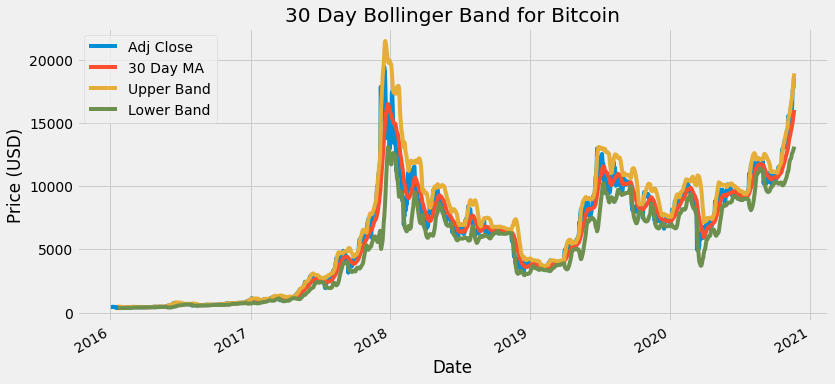

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

# Make function for calls to Yahoo Finance
def get_adj_close(ticker, start, end):
    '''
    A function that takes ticker symbols, starting period, ending period
    as arguments and returns with a Pandas DataFrame of the Adjusted Close Prices
    for the tickers from Yahoo Finance
    '''
    start = start
    end = end
    info = web.DataReader(ticker, data_source='yahoo', start=start, end=end)['Adj Close']
    return pd.DataFrame(info)

# Get Adjusted Closing Prices for Facebook, Tesla and Amazon between 2016-2017
fb = get_adj_close('BTC-USD', '1/2/2016', '20/11/2020')
tesla = get_adj_close('tsla', '1/2/2016', '31/12/2017')
amazon = get_adj_close('amzn', '1/2/2016', '20/11/2020')

# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
for item in (fb, tesla, amazon):
    item['30 Day MA'] = item['Adj Close'].rolling(window=20).mean()
    
    # set .std(ddof=0) for population std instead of sample
    item['30 Day STD'] = item['Adj Close'].rolling(window=20).std() 
    
    item['Upper Band'] = item['30 Day MA'] + (item['30 Day STD'] * 2)
    item['Lower Band'] = item['30 Day MA'] - (item['30 Day STD'] * 2)

df1=[]
df1.append(fb['Adj Close'])

df2=[]
df2.append(fb['Upper Band'])

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
fb[['Adj Close', '30 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('30 Day Bollinger Band for Bitcoin')
plt.ylabel('Price (USD)')
plt.show();

#print(df2)

In [83]:
#df.to_csv('AAPL.csv')

In [84]:
#import pandas as pd

In [85]:
#df=pd.read_csv('AAPL.csv')

In [86]:
#df.head()

In [87]:
#df.tail()

In [88]:
#df1=df.reset_index()['close']

In [89]:
df1

[Date
 2016-01-02      433.437988
 2016-01-03      430.010986
 2016-01-04      433.091003
 2016-01-05      431.959991
 2016-01-06      429.105011
                   ...     
 2020-11-17    17645.406250
 2020-11-18    17804.005859
 2020-11-19    17817.089844
 2020-11-20    18621.314453
 2020-11-21    18577.556641
 Name: Adj Close, Length: 1786, dtype: float64]

 ...]

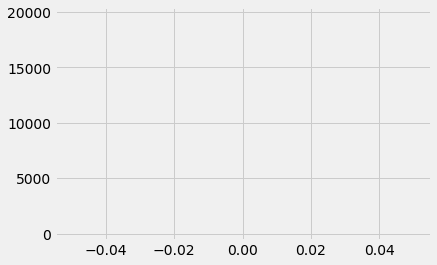

In [90]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [91]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [92]:
import numpy as np

In [93]:
df1

[Date
 2016-01-02      433.437988
 2016-01-03      430.010986
 2016-01-04      433.091003
 2016-01-05      431.959991
 2016-01-06      429.105011
                   ...     
 2020-11-17    17645.406250
 2020-11-18    17804.005859
 2020-11-19    17817.089844
 2020-11-20    18621.314453
 2020-11-21    18577.556641
 Name: Adj Close, Length: 1786, dtype: float64]

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [95]:
print(df1)

[[0.00361191]
 [0.0034328 ]
 [0.00359378]
 ...
 [0.91217768]
 [0.9542109 ]
 [0.95192388]]


In [96]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [97]:
training_size,test_size

(1160, 626)

In [98]:
train_data

array([[0.00361191],
       [0.0034328 ],
       [0.00359378],
       ...,
       [0.17755782],
       [0.18460415],
       [0.18499968]])

In [99]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [100]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [101]:
print(X_train.shape), print(y_train.shape)

(1059, 100)
(1059,)


(None, None)

In [102]:
print(X_test.shape), print(ytest.shape)

(525, 100)
(525,)


(None, None)

In [103]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [104]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [105]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [106]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 4s 226ms/step - loss: 0.0188 - val_loss: 0.0093
Epoch 2/100
17/17 [==============================] - 3s 177ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 3/100
17/17 [==============================] - 3s 176ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 4/100
17/17 [==============================] - 3s 177ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 5/100
17/17 [==============================] - 3s 177ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 6/100
17/17 [==============================] - 3s 179ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 7/100
17/17 [==============================] - 3s 177ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 8/100
17/17 [==============================] - 3s 179ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 9/100
17/17 [==============================] - 3s 180ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 10/100
17/17 [==============================] - 3s 178ms/step - loss: 0.0016 - val_lo

In [109]:
import tensorflow as tf

In [110]:
tf.__version__

'2.3.0'

In [111]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [112]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [113]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5773.068834171868

In [114]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

9642.834660238505

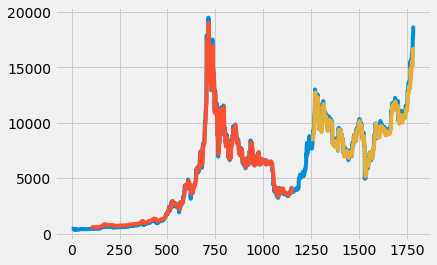

In [115]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [116]:
len(test_data)

626

In [117]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 285)

In [118]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [119]:
temp_input

[0.5144969231141876,
 0.5206547620333127,
 0.514818019251981,
 0.5199262601775307,
 0.4978340700808973,
 0.5001864782663619,
 0.48741847902084334,
 0.5110348422007363,
 0.4844521039872599,
 0.4831501104442667,
 0.48722503531360495,
 0.48600935135080703,
 0.4996681103796302,
 0.48532954218544866,
 0.4692072086401939,
 0.4419673232682229,
 0.4400842840357305,
 0.4342285031270109,
 0.4304159267155104,
 0.4284792438586624,
 0.44453604133001373,
 0.44025634175000505,
 0.43855561938354315,
 0.4554643858156394,
 0.4577527381033245,
 0.4466415153055523,
 0.4047330335043066,
 0.39509152351654225,
 0.39436424663410424,
 0.3944531337623775,
 0.24075891832671745,
 0.2717481408613054,
 0.2527579405555463,
 0.2627902425603214,
 0.24304249832241656,
 0.2540783342189774,
 0.2547478076717459,
 0.30454402043633244,
 0.30494047795505913,
 0.30422381750826905,
 0.2856794054186103,
 0.3163101446081352,
 0.33295612873766767,
 0.3301473414207329,
 0.3319963621226516,
 0.3191054827385641,
 0.3072096134734104,

In [120]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.52065476 0.51481802 0.51992626 0.49783407 0.50018648 0.48741848
 0.51103484 0.4844521  0.48315011 0.48722504 0.48600935 0.49966811
 0.48532954 0.46920721 0.44196732 0.44008428 0.4342285  0.43041593
 0.42847924 0.44453604 0.44025634 0.43855562 0.45546439 0.45775274
 0.44664152 0.40473303 0.39509152 0.39436425 0.39445313 0.24075892
 0.27174814 0.25275794 0.26279024 0.2430425  0.25407833 0.25474781
 0.30454402 0.30494048 0.30422382 0.28567941 0.31631014 0.33295613
 0.33014734 0.33199636 0.31910548 0.30720961 0.29047676 0.31701713
 0.31747721 0.32626471 0.33603043 0.33288209 0.339893   0.33590002
 0.36102154 0.35603715 0.3642786  0.36260561 0.33978668 0.33945165
 0.34530585 0.33871756 0.33858116 0.32811144 0.35292159 0.35184389
 0.36028375 0.35671714 0.34064725 0.34056178 0.35294267 0.36927654
 0.37560988 0.37660476 0.38235037 0.38839926 0.3889981  0.44094896
 0.43350194 0.44427977 0.45075181 0.44598896 0.44678264 0.45150828
 0.46539479 0.50107943 0.4953902  0.48238813 0.438

ValueError: ignored

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)